# Monte Carlo Portfolio Optimisation with RiskOptima

In [16]:
import pandas as pd
from riskoptima import RiskOptima

# Define your current porfolio with your weights and company names
asset_data = [
    ('MO',    0.04, 'Altria Group Inc.'),
    ('NWN',   0.14, 'Northwest Natural Gas'),
    ('BKH',   0.01, 'Black Hills Corp.'),
    ('ED',    0.01, 'Con Edison'),
    ('PEP',   0.09, 'PepsiCo Inc.'),
    ('NFG',   0.16, 'National Fuel Gas'),
    ('KO',    0.06, 'Coca-Cola Company'),
    ('FRT',   0.28, 'Federal Realty Inv. Trust'),
    ('GPC',   0.16, 'Genuine Parts Co.'),
    ('MSEX',  0.05, 'Middlesex Water Co.')
]

# Convert the list into a DataFrame with appropriate column names
asset_table = pd.DataFrame(asset_data, columns=['Asset', 'Weight', 'Label'])

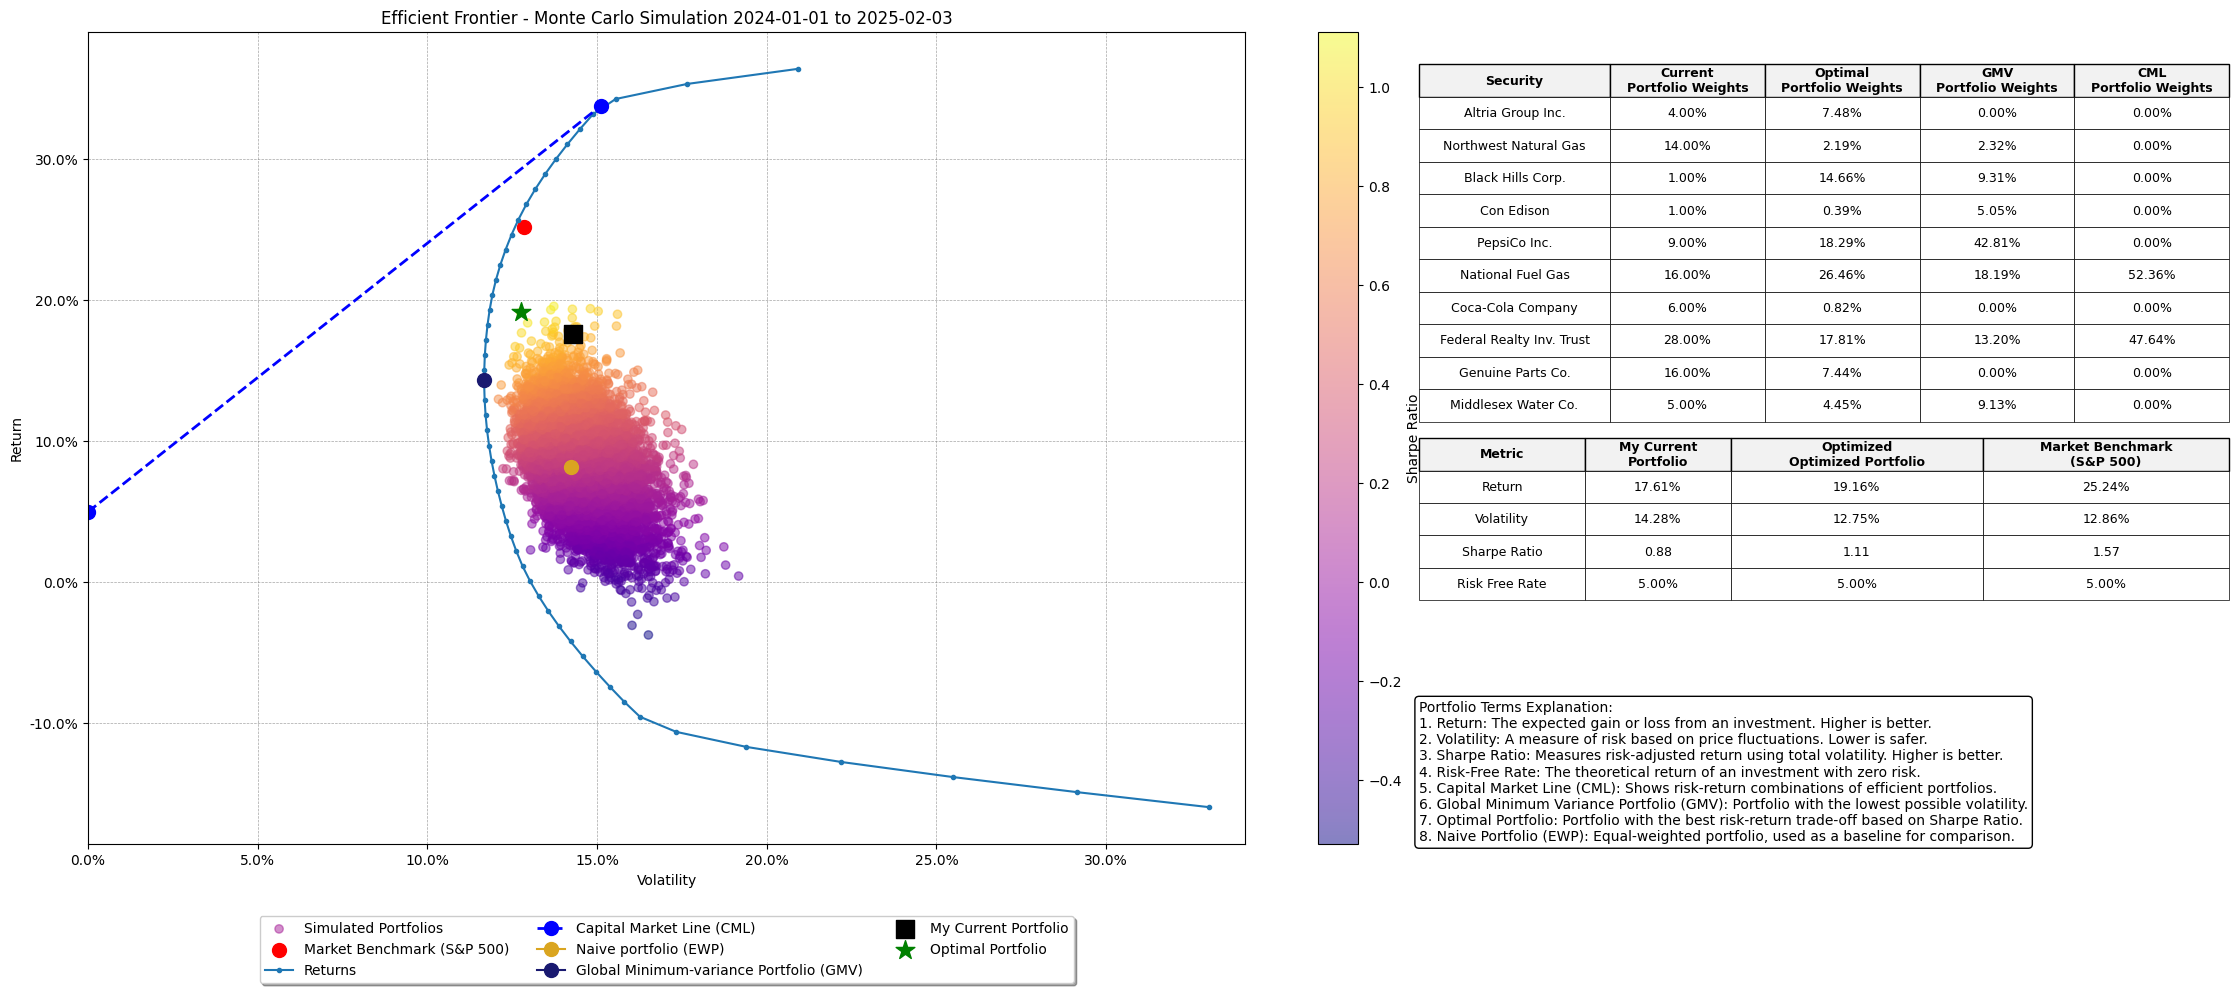

In [18]:
start_date = '2024-01-01'
end_date = RiskOptima.get_previous_working_day()

RiskOptima.plot_efficient_frontier_monte_carlo(
    asset_table,
    start_date=start_date,
    end_date=end_date,
    risk_free_rate=0.05,
    num_portfolios=10000,
    market_benchmark='SPY',
    set_ticks=False,
    x_pos_table=1.15,    # Position for the weight table on the plot
    y_pos_table=0.52,    # Position for the weight table on the plot
    title=f'Efficient Frontier - Monte Carlo Simulation {start_date} to {end_date}'
)